In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [25]:
covid = pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv',parse_dates=['Date'],dayfirst=True)


In [26]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [27]:
covid.shape

(18110, 9)

In [28]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  int64         
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18110 non-null  object        
 5   ConfirmedForeignNational  18110 non-null  object        
 6   Cured                     18110 non-null  int64         
 7   Deaths                    18110 non-null  int64         
 8   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB


In [29]:
covid.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [30]:
covid.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [33]:
covid=covid[['Date','State/UnionTerritory','Cured','Deaths','Confirmed','ConfirmedIndianNational']]

In [34]:
covid.columns=['date','state','cured','dead','confirmed','national']

In [36]:
covid.head()

,date,state,cured,dead,confirmed,national
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [37]:
covid.tail()

,date,state,cured,dead,confirmed,national
18105,2021-08-11,Telangana,638410,3831,650353,-
18106,2021-08-11,Tripura,77811,773,80660,-
18107,2021-08-11,Uttarakhand,334650,7368,342462,-
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,-
18109,2021-08-11,West Bengal,1506532,18252,1534999,-


In [38]:
today=covid[covid.date=="2021-08-11"]

In [39]:
today.head()

,date,state,cured,dead,confirmed,national
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548,-
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182,-
18076,2021-08-11,Arunachal Pradesh,47821,248,50605,-
18077,2021-08-11,Assam,559684,5420,576149,-
18078,2021-08-11,Bihar,715352,9646,725279,-


In [52]:
max_confirmed=today.sort_values(by="confirmed",ascending=False)

In [63]:
top_5=max_confirmed[0:5]

In [53]:
top_5.head()

,date,state,cured,dead,confirmed,national
18094,2021-08-11,Maharashtra,6159676,134201,6363442,-
18090,2021-08-11,Kerala,3396184,18004,3586693,-
18089,2021-08-11,Karnataka,2861499,36848,2921049,-
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130,-
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182,-


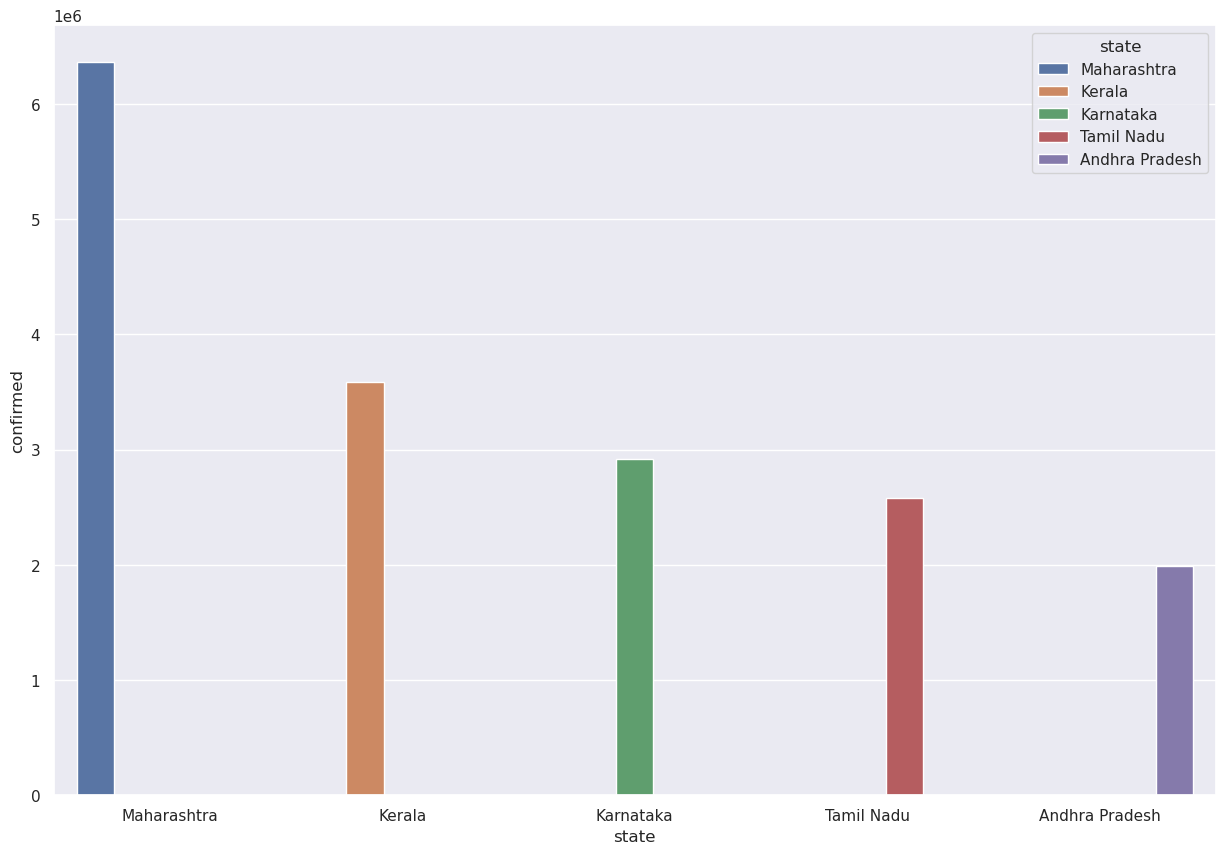

In [47]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="confirmed",data=top_5,hue="state")
plt.show()

In [49]:
max_cured=today.sort_values(by="cured",ascending=False)
max_cured[0:5]

,date,state,cured,dead,confirmed,national
18094,2021-08-11,Maharashtra,6159676,134201,6363442,-
18090,2021-08-11,Kerala,3396184,18004,3586693,-
18089,2021-08-11,Karnataka,2861499,36848,2921049,-
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130,-
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182,-


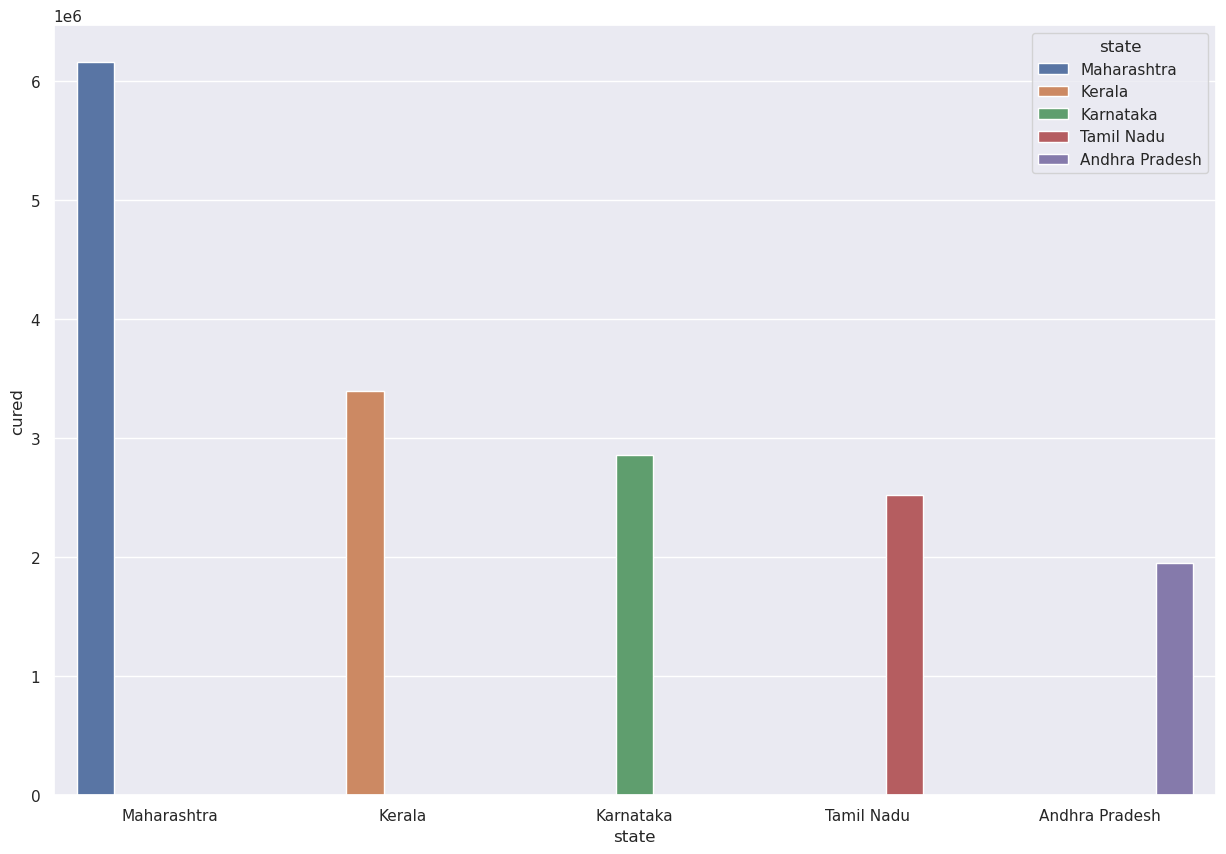

In [51]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="cured",data=max_cured[0:5],hue="state")
plt.show()

In [57]:
max_dead=today.sort_values(by="dead",ascending=False)
max_dead

,date,state,cured,dead,confirmed,national
18094,2021-08-11,Maharashtra,6159676,134201,6363442,-
18089,2021-08-11,Karnataka,2861499,36848,2921049,-
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130,-
18082,2021-08-11,Delhi,1411280,25068,1436852,-
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,-
18109,2021-08-11,West Bengal,1506532,18252,1534999,-
18090,2021-08-11,Kerala,3396184,18004,3586693,-
18101,2021-08-11,Punjab,582791,16322,599573,-
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182,-
18080,2021-08-11,Chhattisgarh,988189,13544,1003356,-


In [58]:
max_dead[0:5]

,date,state,cured,dead,confirmed,national
18094,2021-08-11,Maharashtra,6159676,134201,6363442,-
18089,2021-08-11,Karnataka,2861499,36848,2921049,-
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130,-
18082,2021-08-11,Delhi,1411280,25068,1436852,-
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,-


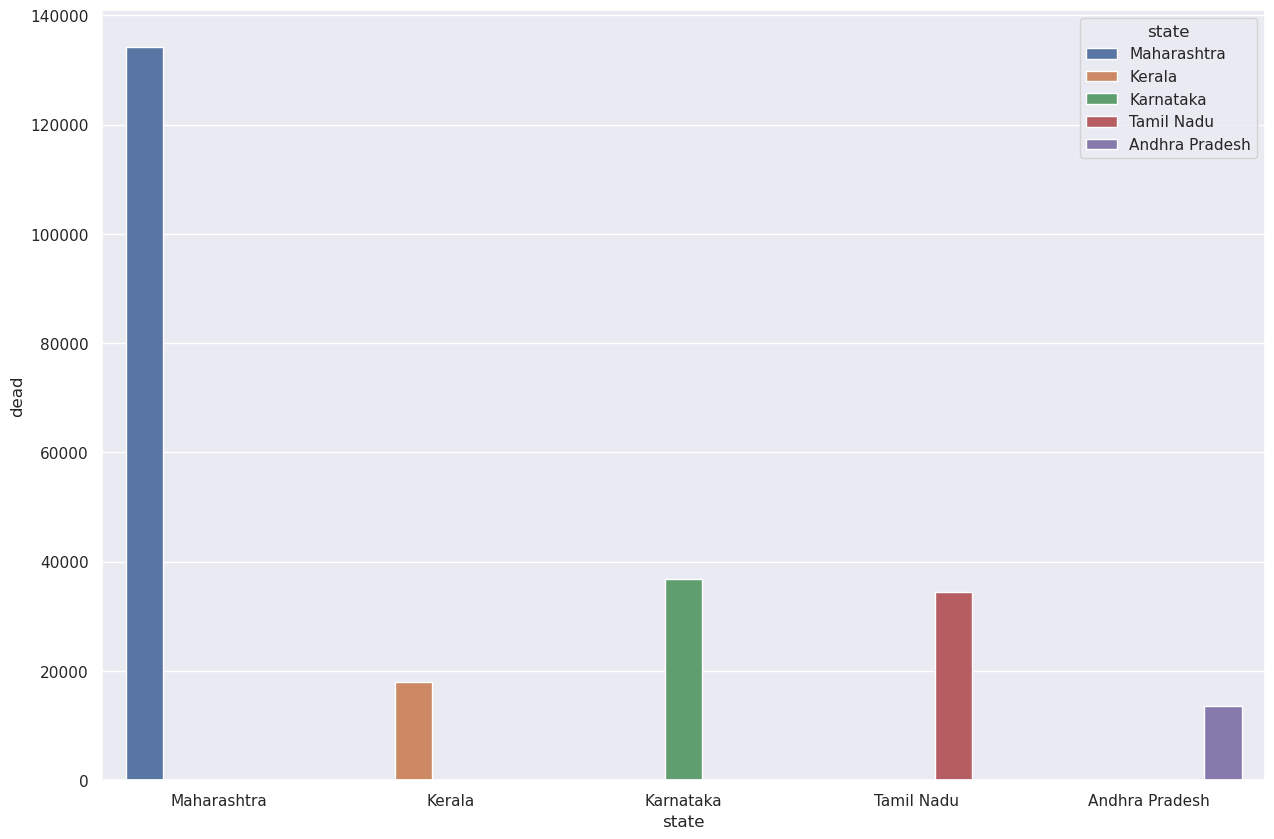

In [65]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="dead",data=max_cured[0:5],hue="state")
plt.show()

In [66]:
Delhi = covid[covid.state=="Delhi"]

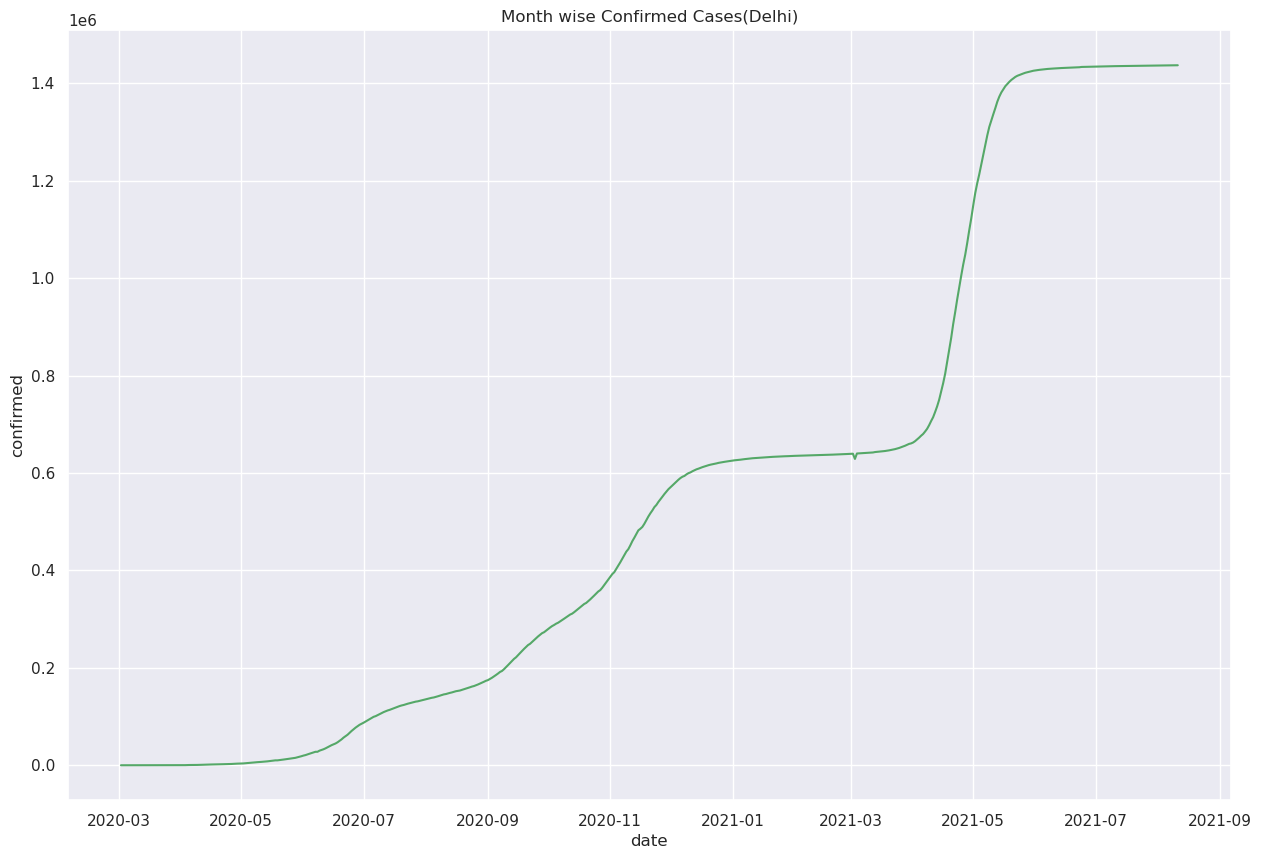

In [82]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=Delhi,color='g')
plt.title("Month wise Confirmed Cases(Delhi)")
plt.show()

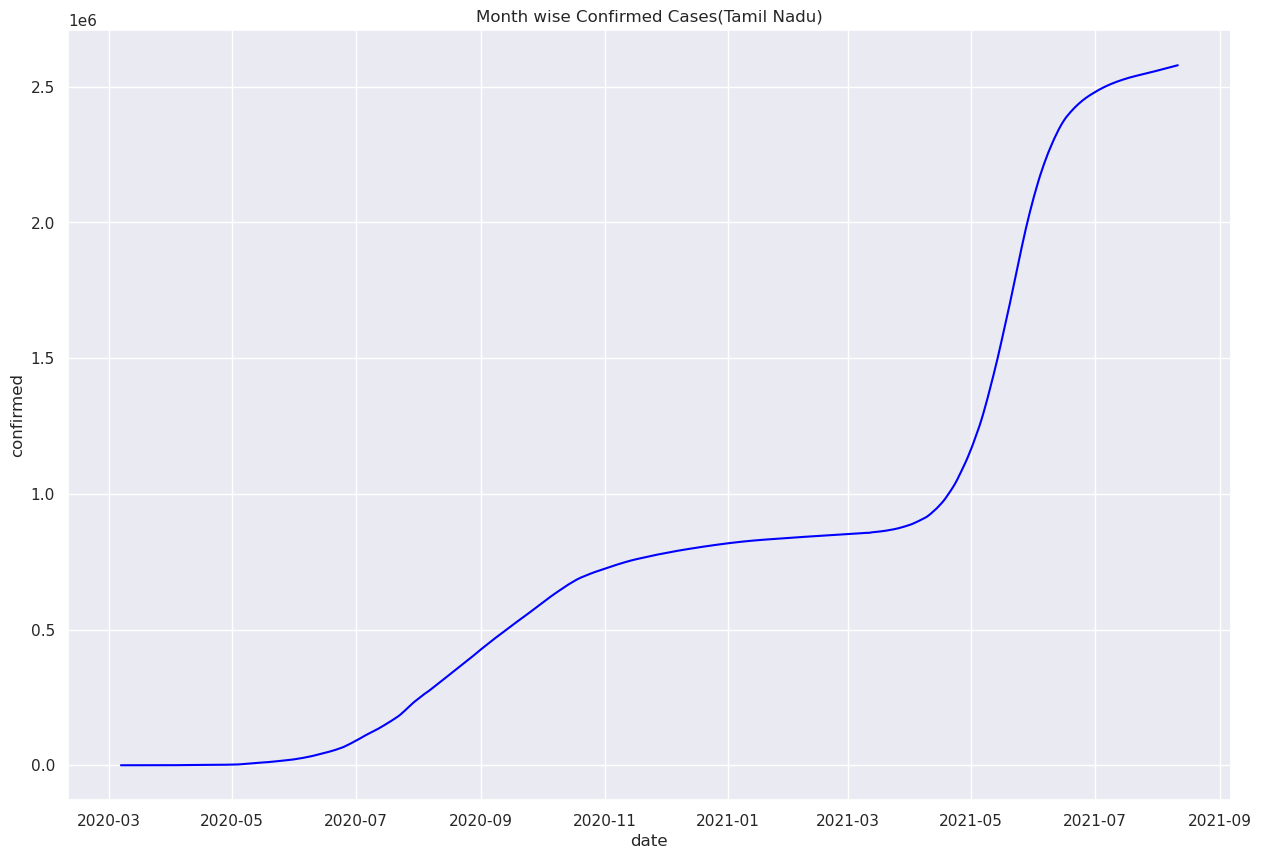

In [83]:
TamilNadu=covid[covid.state=="Tamil Nadu"]
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=TamilNadu,color='blue')
plt.title("Month wise Confirmed Cases(Tamil Nadu)")
plt.show()

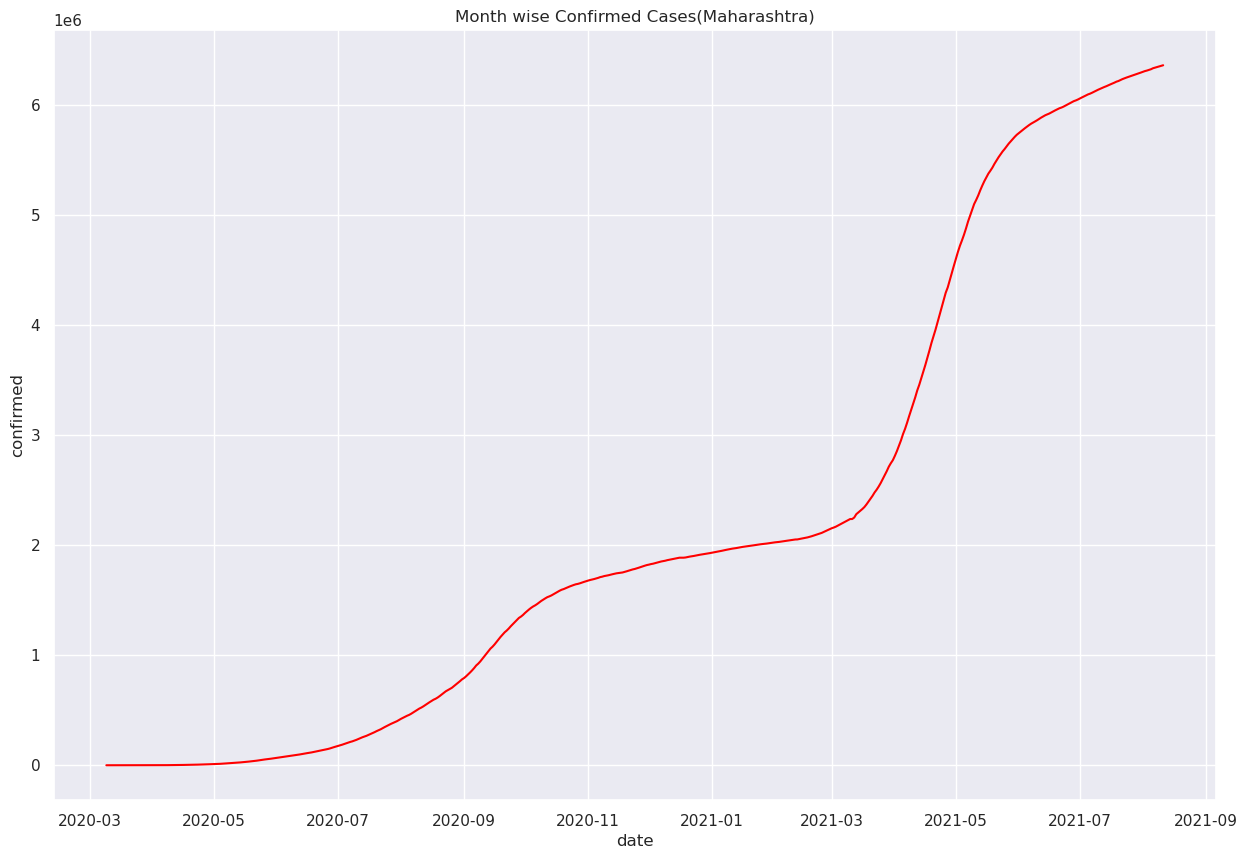

In [84]:
Maharashtra=covid[covid.state=="Maharashtra"]
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=Maharashtra,color='red')
plt.title("Month wise Confirmed Cases(Maharashtra)")
plt.show()

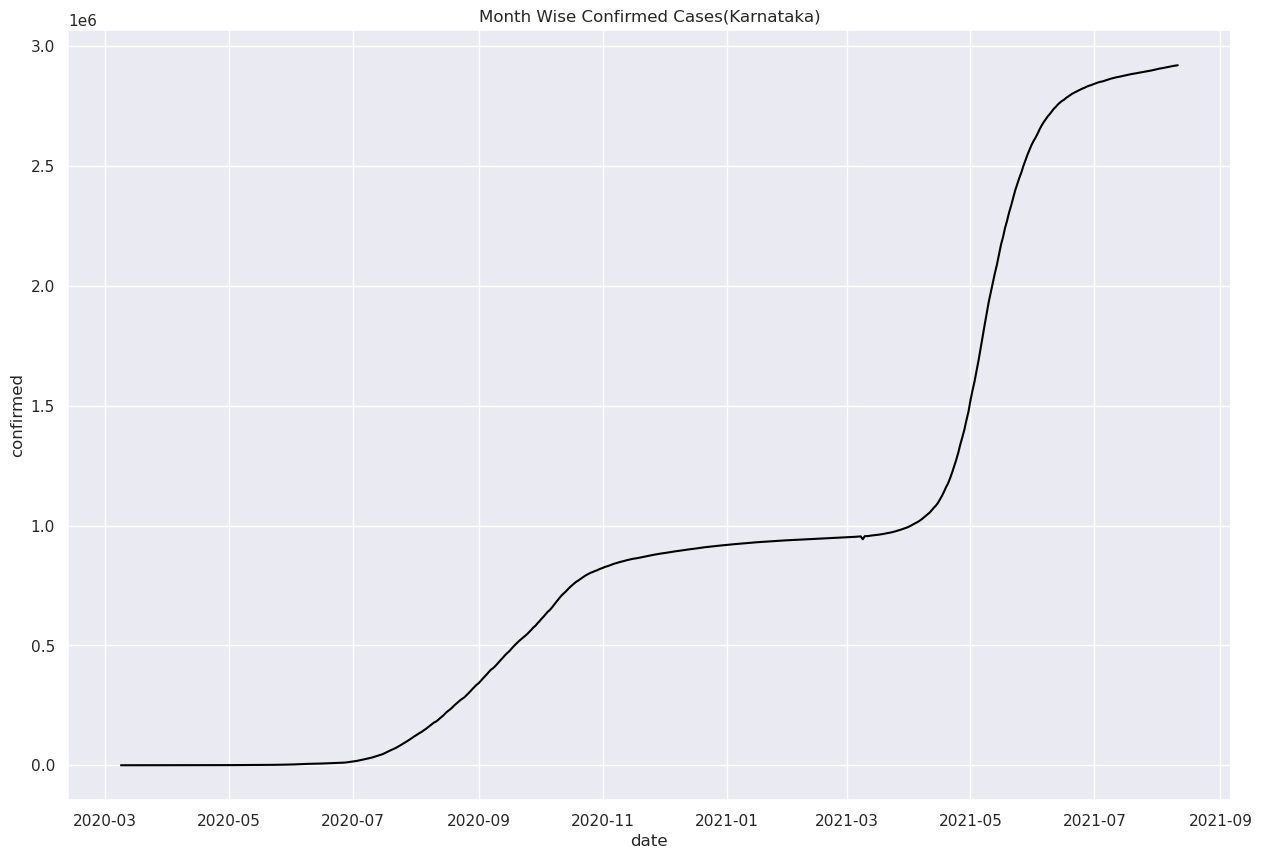

In [85]:
Karnataka=covid[covid.state=="Karnataka"]
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=Karnataka,color='black')
plt.title("Month Wise Confirmed Cases(Karnataka)")
plt.show()

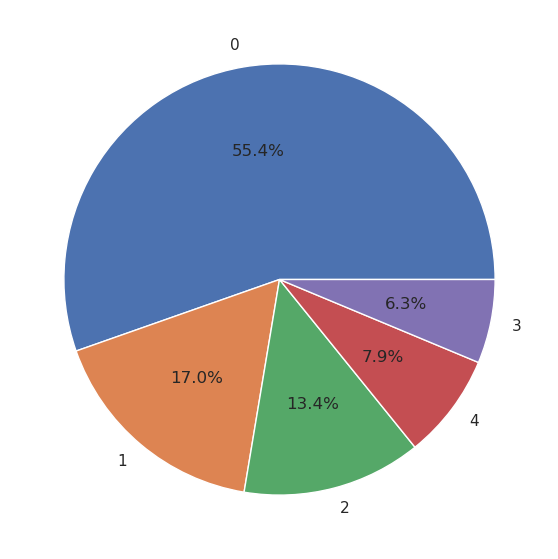

In [90]:
plt.figure(figsize=(7,7))
plt.pie(list(covid['dead'].value_counts()[0:5]),labels=list(covid['dead'].value_counts()[0:5].keys()),autopct='%0.1f%%')
plt.show()

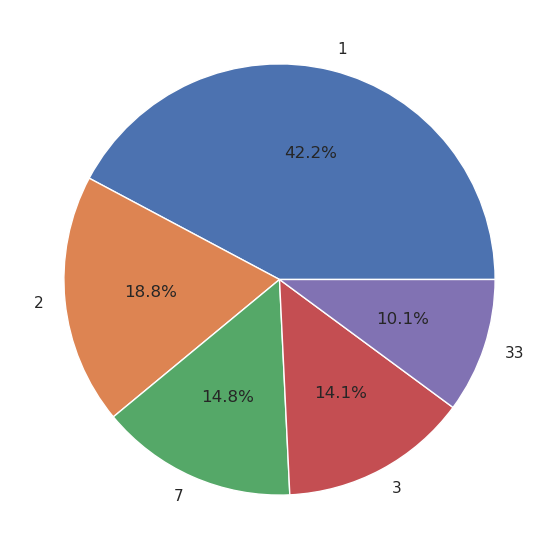

In [93]:
plt.figure(figsize=(7,7))
plt.pie(list(covid['confirmed'].value_counts()[0:5]),labels=list(covid['confirmed'].value_counts()[0:5].keys()),autopct='%0.1f%%')
plt.show()

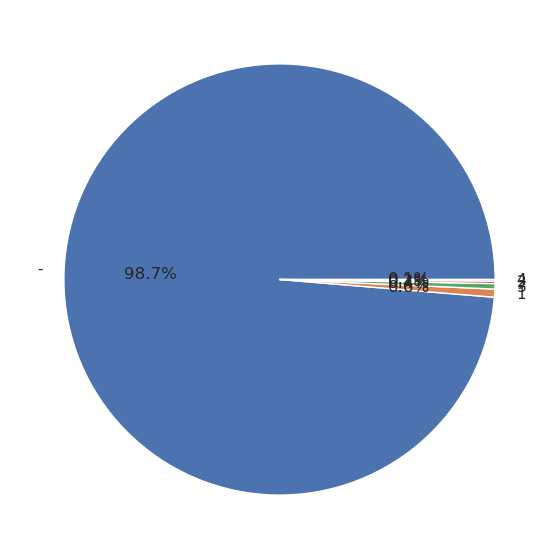

In [95]:
plt.figure(figsize=(7,7))
plt.pie(list(covid['national'].value_counts()[0:5]),labels=list(covid['national'].value_counts()[0:5].keys()),autopct='%0.1f%%')
plt.show()

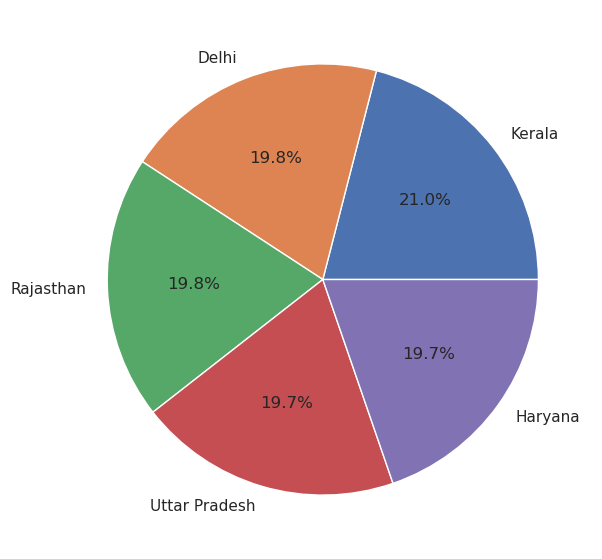

In [96]:
plt.figure(figsize=(7,7))
plt.pie(list(covid['state'].value_counts()[0:5]),labels=list(covid['state'].value_counts()[0:5].keys()),autopct='%0.1f%%')
plt.show()

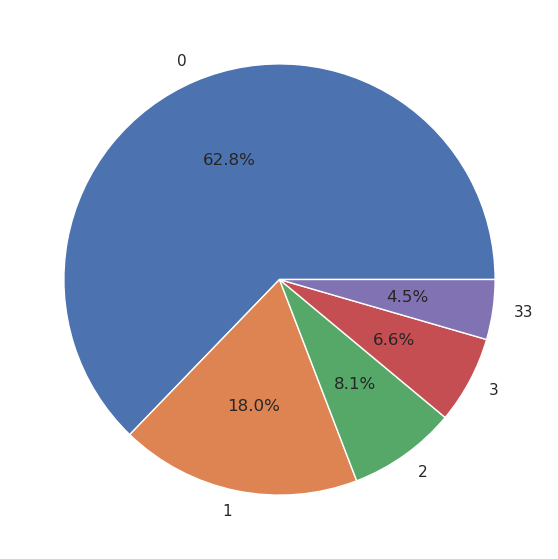

In [97]:
plt.figure(figsize=(7,7))
plt.pie(list(covid['cured'].value_counts()[0:5]),labels=list(covid['cured'].value_counts()[0:5].keys()),autopct='%0.1f%%')
plt.show()

In [111]:
from sklearn.model_selection import train_test_split
Delhi['date']=Delhi['date'].map(dt.datetime.toordinal)
Delhi.head()

,date,state,cured,dead,confirmed,national
34,737486,Delhi,0,0,1,1
38,737487,Delhi,0,0,1,1
42,737488,Delhi,0,0,1,1
45,737489,Delhi,0,0,2,2
51,737490,Delhi,0,0,3,3


In [112]:
Delhi

,date,state,cured,dead,confirmed,national
34,737486,Delhi,0,0,1,1
38,737487,Delhi,0,0,1,1
42,737488,Delhi,0,0,1,1
45,737489,Delhi,0,0,2,2
51,737490,Delhi,0,0,3,3
...,...,...,...,...,...,...
17938,738009,Delhi,1411042,25065,1436623,-
17974,738010,Delhi,1411064,25066,1436695,-
18010,738011,Delhi,1411159,25066,1436761,-
18046,738012,Delhi,1411235,25067,1436800,-


In [132]:
x=Delhi['date']
y=Delhi['confirmed']

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
lr= LinearRegression()

In [126]:
y_train

10378     629282
6534      249259
3431       73780
2891       32810
4504      129531
          ...   
11566     636387
16138    1431868
3575       85161
12646     642870
11746     637087
Name: confirmed, Length: 369, dtype: int64

In [127]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [128]:
Delhi.tail()

,date,state,cured,dead,confirmed,national
17938,738009,Delhi,1411042,25065,1436623,-
17974,738010,Delhi,1411064,25066,1436695,-
18010,738011,Delhi,1411159,25066,1436761,-
18046,738012,Delhi,1411235,25067,1436800,-
18082,738013,Delhi,1411280,25068,1436852,-


In [129]:
lr.predict(np.array([[738013]]))

array([[1368209.86234236]])